In [90]:
#Library Init

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy import linalg as LA
from PIL import Image


# Define the input image
pil_image_in = Image.open('test01.jpg')
image_in = np.asarray(pil_image_in, np.uint8)

# Print the dimetions image_in
print (f"shape of image = {image_in.shape}")

# Define rows and cols
rows = image_in.shape[0]
cols = image_in.shape[1]
print(f"rows = {rows}; cols = {cols}")



shape of image = (1200, 1600, 3)
rows = 1200; cols = 1600


In [96]:
# Q1: Grayscale image (RGB -> Y)

# Define RGB -> YUV conversion matrex 
Y = [0.299, 0.587,0.114]
U = [-0.14713, -0.28886, 0.436]
V = [0.615, -0.51499, -0.10001]


# Init output image
image_out = np.zeros([rows, cols, 3], np.uint8)
# Init image row for vector dot product
imro = np.zeros([cols, 3], np.int8)

# Row dot product loop
for i in range(rows):
    imro = np.dot(np.reshape(image_in[i,:,:], (cols, 3)), Y)
    
    # Check for extreme values
    imro[imro > 255] = 255
    imro[imro < 0] = 0
    
    # Apply results to each RGB input
    for j in range(3):
        image_out[i, :, j] = imro

    


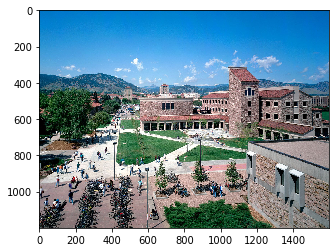

In [97]:
# Show Original image
plt.imshow(image_in)

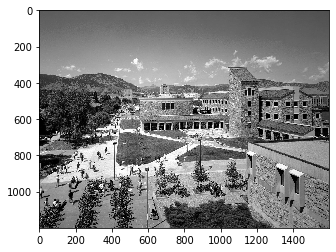

In [98]:
# Show Output (GrayScale) image
plt.imshow(image_out)

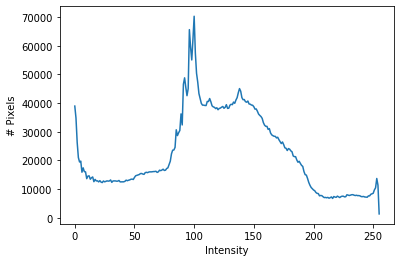

In [94]:
# Q2: Compute and Graph the histogram of a grayscale image

histo = np.zeros([256], np. float64)

for i in range(256):
    
    histo[i] = np.sum(np.where(image_out == i, 1, 0))
    
plt.plot(histo)
plt.xlabel('Intensity')
plt.ylabel('# Pixels')
plt.show()

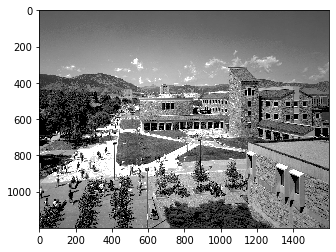

In [95]:
# Q3: Histogram Equalization

# Linear Equalization

tmin = 30
tmax = 220

image_out[image_out < tmin] = 0
image_out[image_out > tmax] = 255


# Show Output (GrayScale) image
plt.imshow(image_out)

In [78]:
# Non-Linear Equalization

histo[0] = 0
histo[255] = 0

S = np.sum(histo)
P = S / 254
T = P

print (S)
print (P)

626640.0
2467.0866141732286


In [80]:
for i in range(254):
    print(i+1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254


In [117]:
# Q6: Edge Detection

grad = np.zeros([rows, cols], np.uint8)

for i in range(rows):
    for j in range(cols):
        grad[i,j] = np.gradient(image_out[i,j])

ValueError: setting an array element with a sequence.